<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/basic_models/Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classfication

## Classification Algorithms Overview

### 1. Logistic Regression
~~~
Use Case: Binary classification
Key Features:
- Simple and interpretable
- Outputs probabilities
- Fast training
- Linear decision boundary

Best For:
- Starting point
- Simple binary problems
- When interpretability matters
~~~

### 2. Decision Trees
~~~
Use Case: Both binary and multi-class
Key Features:
- Easy to understand
- Handles non-linear patterns
- No scaling needed
- Can visualize decisions

Best For:
- Categorical features
- Missing values
- When rules needed
~~~

### 3. Random Forest
~~~
Use Case: Complex classification tasks
Key Features:
- Ensemble of trees
- Reduces overfitting
- Feature importance
- Handles non-linearity

Best For:
- High-dimensional data
- Mixed data types
- Robust predictions
~~~

### 4. Support Vector Machines (SVM)
~~~
Use Case: Binary and multi-class
Key Features:
- Maximizes margin
- Kernel tricks
- Good with high dimensions
- Memory efficient

Best For:
- Clear margin between classes
- Non-linear problems (with kernels)
- Text classification
~~~

### 5. K-Nearest Neighbors (KNN)
~~~
Use Case: Multi-class problems
Key Features:
- Instance-based learning
- No training phase
- Intuitive approach
- Non-parametric

Best For:
- Small to medium datasets
- When similarity matters
- Quick prototyping
~~~

### 6. Neural Networks
~~~
Use Case: Complex patterns
Key Features:
- Deep learning capability
- Learns hierarchical features
- Flexible architecture
- Handles large datasets

Best For:
- Complex patterns
- Large datasets
- When accuracy is priority
~~~

### Quick Selection Guide

#### By Data Size
~~~
Small Data (<1000 samples):
- Logistic Regression
- KNN
- Decision Trees

Medium Data (1000-100k samples):
- Random Forest
- SVM
- Simple Neural Networks

Large Data (>100k samples):
- Neural Networks
- Gradient Boosting
- Distributed Random Forest
~~~

#### By Interpretability Need
~~~
High Interpretability:
- Decision Trees
- Logistic Regression
- KNN

Medium Interpretability:
- Random Forest
- Gradient Boosting

Low Interpretability:
- Neural Networks
- Complex SVMs
~~~

#### By Training Speed
~~~
Fast:
- Logistic Regression
- Decision Trees
- KNN

Medium:
- Random Forest
- SVM

Slow:
- Neural Networks
- Deep Learning models
~~~

### Common Metrics

#### Accuracy
~~~
Use when:
- Balanced classes
- Equal error costs
~~~

#### Precision/Recall
~~~
Use when:
- Imbalanced classes
- Different error costs
~~~

#### ROC-AUC
~~~
Use when:
- Ranking performance matters
- Need probability estimates
~~~

### Best Practices

#### 1. Model Selection
~~~
1. Start simple (Logistic Regression)
2. Establish baseline
3. Try more complex if needed
4. Consider interpretability vs performance
~~~

#### 2. Validation Strategy
~~~
1. Train-test split
2. Cross-validation
3. Hold-out validation
4. Time-based split for temporal data
~~~

#### 3. Parameter Tuning
~~~
1. Grid search
2. Random search
3. Bayesian optimization
4. Cross-validation for each
~~~

### Common Pitfalls
~~~
1. Not handling imbalanced data
2. Overfitting to training data
3. Wrong metric selection
4. Insufficient validation
5. Data leakage
~~~

## Classfication Model Walkthrough

### Problem Statement

**Question**: Can you predict whether a patient should be treated of his/her mental illness or not according to the values obtained in the dataset?

### Dataset
[Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey)

### Similar notebook in Kaggle

Most of the code is taken from [Machine Learning for Mental Health](https://www.kaggle.com/code/youpengcheng/machine-learning-for-mental-health). It would be easier to use Kaggle notebook.

## Getting data

The dataset is in Kaggle. If you are using Kaggle notebook, you can add the dataset directly to the notbook. On colab, we need to first get the data.

### Dataset

[Mental Health in Tech Survey](https://www.kaggle.com/code/youpengcheng/machine-learning-for-mental-health)

### Data Columns

- Timestamp
- Age
- Gender
- Country
- state: If you live in the United States, which state or territory do you live in?
- self_employed: Are you self-employed?
- family_history: Do you have a family history of mental illness?
- treatment: Have you sought treatment for a mental health condition?
- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
- no_employees: How many employees does your company or organization have?
- remote_work: Do you work remotely (outside of an office) at least 50% of the time?
- tech_company: Is your employer primarily a tech company/organization?
- benefits: Does your employer provide mental health benefits?
- care_options: Do you know the options for mental health care your employer provides?
- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- leave: How easy is it for you to take medical leave for a mental health condition?
- mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
- phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
- coworkers: Would you be willing to discuss a mental health issue with your coworkers?
- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
- phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
- mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- comments: Any additional notes or comments



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/calmrocks/master-machine-learning-engineer/main/basic_models/data/survey.csv"
df = pd.read_csv(url)

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [9]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [10]:
print(df.shape)

(1259, 24)


In [11]:
print(df.columns.tolist())

['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [12]:
print(df.isnull().sum())

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64


In [13]:
print(df.dtypes)

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object


In [15]:
print(df['self_employed'].unique())
print(df['benefits'].unique())

[nan 'Yes' 'No']
['Yes' "Don't know" 'No']


In [19]:
print(df['work_interfere'].value_counts())

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64
Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                

## Data cleanup

In [7]:
df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


#### Deal with null values

- self_employed: drop
- fill with the most frequent value

In [21]:
import pandas as pd
import numpy as np

# Make a copy of the original DataFrame to avoid the warning
df = df.copy()

# Print initial counts
print("Initial counts:")
print("\nwork_interfere counts:")
print(df['work_interfere'].value_counts())
print("\nwork_interfere null count:", df['work_interfere'].isnull().sum())

print("\nself_employed counts:")
print(df['self_employed'].value_counts())
print("\nself_employed null count:", df['self_employed'].isnull().sum())

# 1. Handle self_employed: Drop rows with NaN values
df = df.dropna(subset=['self_employed'])

# 2. For work_interfere, using .loc to avoid the warning
mode_value = df['work_interfere'].mode()[0]
df.loc[df['work_interfere'].isnull(), 'work_interfere'] = mode_value

# Alternative method using fillna with inplace=True
# df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace=True)

# Print results after cleaning
print("\nAfter cleaning:")
print("\nwork_interfere counts:")
print(df['work_interfere'].value_counts())
print("\nwork_interfere null count:", df['work_interfere'].isnull().sum())

print("\nself_employed counts:")
print(df['self_employed'].value_counts())
print("\nself_employed null count:", df['self_employed'].isnull().sum())

# Print total number of rows
print("\nTotal number of rows in dataset:", len(df))

Initial counts:

work_interfere counts:
work_interfere
Sometimes    722
Never        207
Rarely       170
Often        142
Name: count, dtype: int64

work_interfere null count: 0

self_employed counts:
self_employed
No     1095
Yes     146
Name: count, dtype: int64

self_employed null count: 0

After cleaning:

work_interfere counts:
work_interfere
Sometimes    722
Never        207
Rarely       170
Often        142
Name: count, dtype: int64

work_interfere null count: 0

self_employed counts:
self_employed
No     1095
Yes     146
Name: count, dtype: int64

self_employed null count: 0

Total number of rows in dataset: 1241


#### Cleanup data
- Gender
-

In [22]:
print(df['Gender'].value_counts())

Gender
Male                                              605
male                                              205
Female                                            118
M                                                 114
female                                             60
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

In [23]:
import pandas as pd

# Make a copy of the DataFrame
df = df.copy()

# Create a function to standardize gender
def clean_gender(gender):
    # Convert to lowercase
    gender = str(gender).lower().strip()

    # Male category
    if gender in ['male', 'm', 'male-ish', 'maile', 'mal', 'male (cis)',
                 'make', 'male leaning androgynous', 'man', 'msle', 'mail',
                 'malr', 'cis male', 'cis man', 'cis-male', 'something kinda male?']:
        return 'male'

    # Female category
    elif gender in ['female', 'f', 'woman', 'female (cis)', 'cis-female/femme',
                   'female (trans)', 'trans-female', 'trans woman', 'cis female',
                   'femake', 'female (cis)', 'femail']:
        return 'female'

    # Non-binary category
    elif gender in ['non-binary', 'enby', 'genderqueer', 'androgyne', 'agender',
                   'queer', 'queer/she/they', 'fluid', 'all', 'nah', 'p']:
        return 'non-binary'

    # Other/Unknown category
    else:
        return 'other'

# Print original value counts
print("Original gender distribution:")
print(df['Gender'].value_counts())

# Apply the cleaning function
df['gender_cleaned'] = df['Gender'].apply(clean_gender)

# Print new value counts
print("\nCleaned gender distribution:")
print(df['gender_cleaned'].value_counts())
print("\nPercentage distribution:")
print(df['gender_cleaned'].value_counts(normalize=True) * 100)

# Drop the original Gender column (optional)
# df = df.drop('Gender', axis=1)

Original gender distribution:
Gender
Male                                              605
male                                              205
Female                                            118
M                                                 114
female                                             60
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                     

In [28]:
print(df['Age'].unique())

[         46          36          29          31          41          33
          35          34          37          32          30          42
          40          27          38          50          24          18
          28          26          22          44          23          19
          25          39          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


Original age statistics:
count    1.241000e+03
mean     8.058021e+07
std      2.838665e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

Unique ages: [-1726, -29, -1, 5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72, 329, 99999999999]

Cleaned age statistics:
count    1233.000000
mean       32.061638
std         7.305337
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: age_cleaned, dtype: float64

Age distribution:
age_cleaned
18.0     7
19.0     9
20.0     6
21.0    16
22.0    21
23.0    49
24.0    46
25.0    61
26.0    75
27.0    70
28.0    68
29.0    83
30.0    63
31.0    64
32.0    80
33.0    69
34.0    65
35.0    54
36.0    36
37.0    42
38.0    39
39.0    32
40.0    33
41.0    21
42.0    18
4

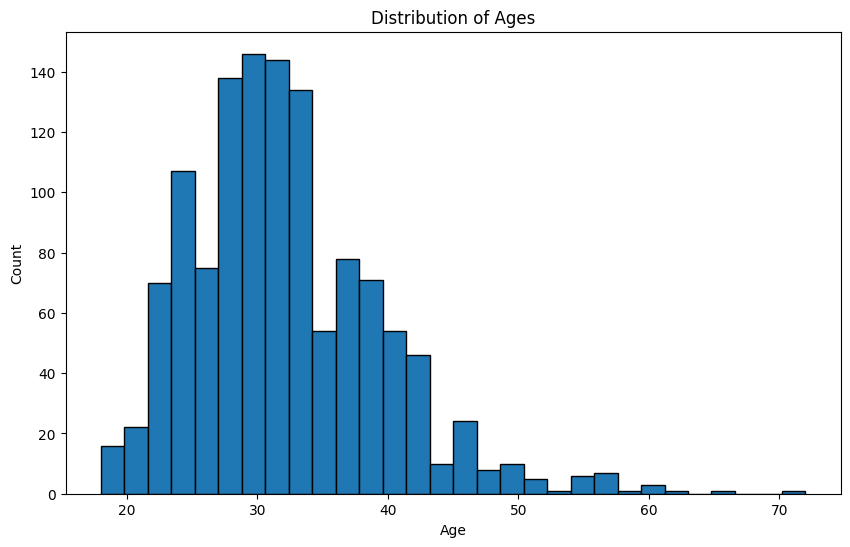


Number of invalid ages removed: 8


In [29]:
import pandas as pd
import numpy as np

# Make a copy of the DataFrame
df = df.copy()

# Print original age statistics
print("Original age statistics:")
print(df['Age'].describe())
print("\nUnique ages:", sorted(df['Age'].unique()))

def clean_age(age):
    # Convert to numeric, if not already
    try:
        age = float(age)
    except:
        return np.nan

    # Set reasonable age range for working professionals (e.g., 16-100)
    if 16 <= age <= 100:
        return age
    else:
        return np.nan

# Apply the cleaning function
df['age_cleaned'] = df['Age'].apply(clean_age)

# Print statistics after cleaning
print("\nCleaned age statistics:")
print(df['age_cleaned'].describe())

# Show distribution of cleaned ages
print("\nAge distribution:")
print(df['age_cleaned'].value_counts().sort_index())

# Visualize the age distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['age_cleaned'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Print number of removed values
print(f"\nNumber of invalid ages removed: {df['Age'].count() - df['age_cleaned'].count()}")

In [ ]:
## Exploratory data analysis (EDA)


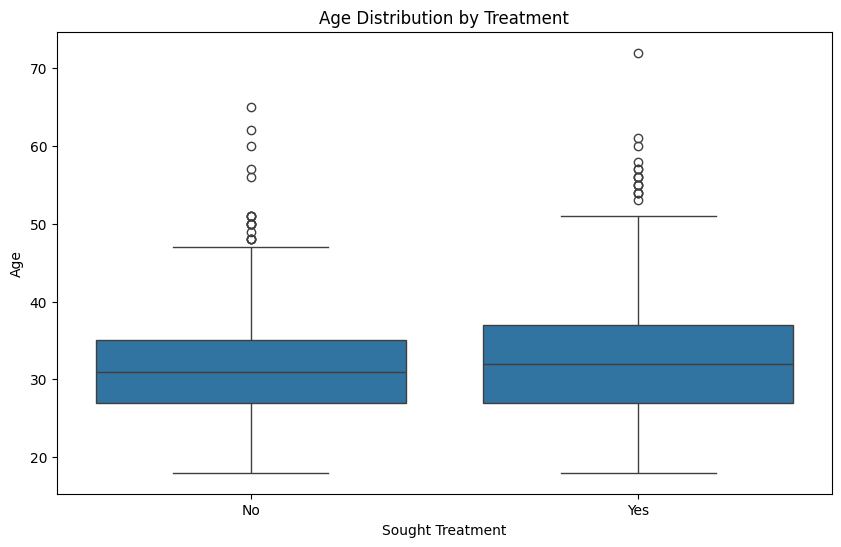

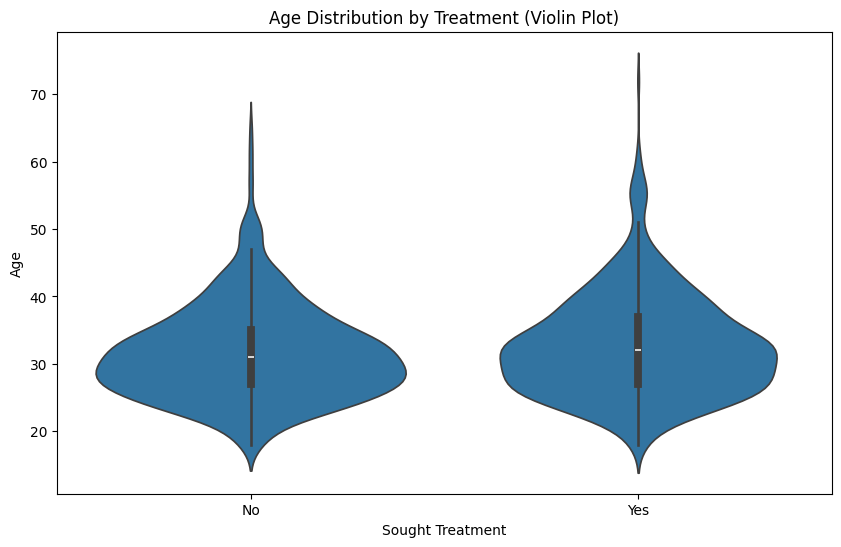

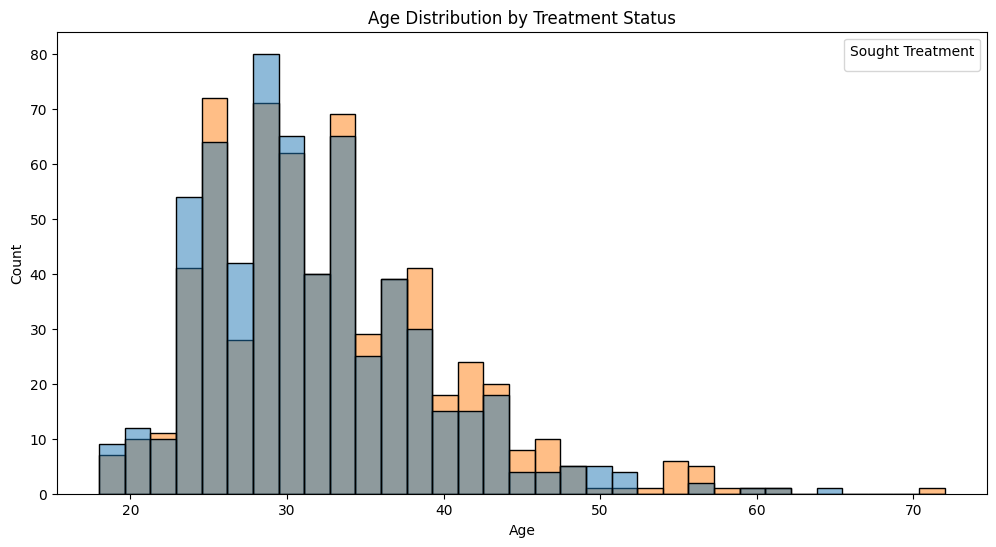

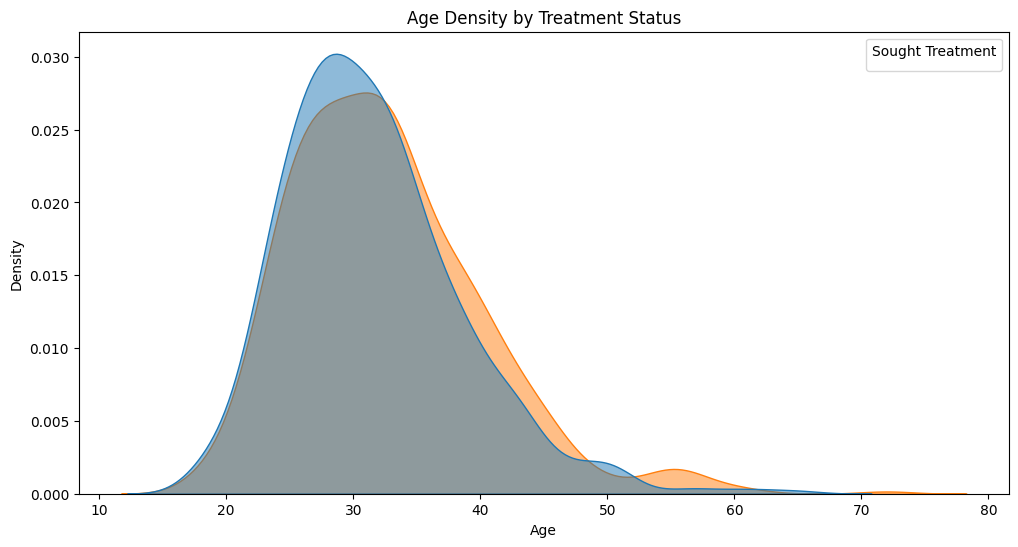


Age Statistics by Treatment:
           count       mean       std   min   25%   50%   75%   max
treatment                                                          
No         610.0  31.518033  6.978539  18.0  27.0  31.0  35.0  65.0
Yes        623.0  32.593900  7.579616  18.0  27.0  32.0  37.0  72.0


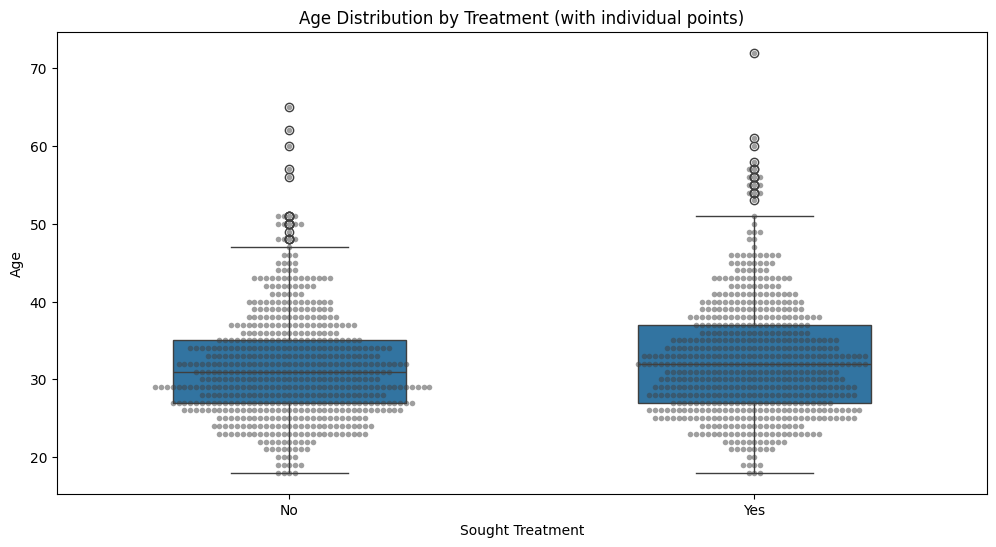


Percentage of Each Age Group by Treatment Status:
treatment         No        Yes
age_group                      
18-25      18.196721  16.693419
26-35      58.196721  53.932584
36-45      19.836066  24.077047
46-55       2.950820   3.852327
55+         0.819672   1.444623


<Figure size 1000x600 with 0 Axes>

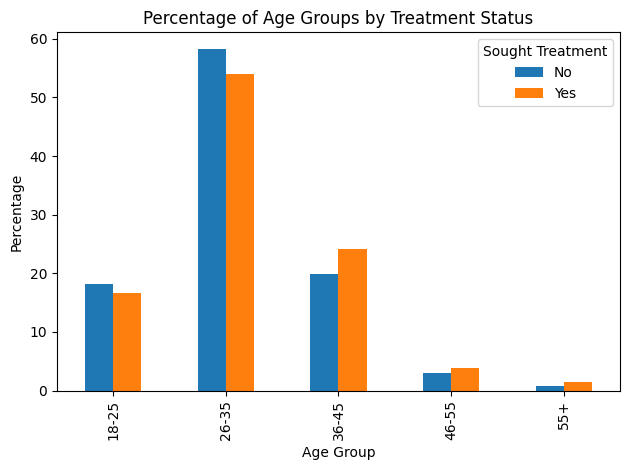


T-test Results:
t-statistic: nan
p-value: nan


In [37]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure we're using the cleaned age data
df = df.copy()

# 1. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='treatment', y='age_cleaned', data=df)
plt.title('Age Distribution by Treatment')
plt.xlabel('Sought Treatment')
plt.ylabel('Age')
plt.show()

# 2. Violin Plot (shows density)
plt.figure(figsize=(10, 6))
sns.violinplot(x='treatment', y='age_cleaned', data=df)
plt.title('Age Distribution by Treatment (Violin Plot)')
plt.xlabel('Sought Treatment')
plt.ylabel('Age')
plt.show()

# 3. Histogram by treatment
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age_cleaned', hue='treatment', multiple="layer", alpha=0.5)
plt.title('Age Distribution by Treatment Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sought Treatment')
plt.show()

# 4. Kernel Density Estimation (KDE) Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='age_cleaned', hue='treatment', fill=True, alpha=0.5)
plt.title('Age Density by Treatment Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Sought Treatment')
plt.show()

# 5. Statistical Summary
print("\nAge Statistics by Treatment:")
print(df.groupby('treatment')['age_cleaned'].describe())

# 6. Side-by-side box plots with individual points
plt.figure(figsize=(12, 6))
sns.boxplot(x='treatment', y='age_cleaned', data=df, width=0.5)
sns.swarmplot(x='treatment', y='age_cleaned', data=df, color='0.25', size=4, alpha=0.5)
plt.title('Age Distribution by Treatment (with individual points)')
plt.xlabel('Sought Treatment')
plt.ylabel('Age')
plt.show()

# 7. Calculate and show percentages
age_bins = [0, 25, 35, 45, 55, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '55+']

df['age_group'] = pd.cut(df['age_cleaned'], bins=age_bins, labels=age_labels)

# Create a crosstab of age groups and treatment
age_treatment_cross = pd.crosstab(df['age_group'],
                                 df['treatment'],
                                 normalize='columns') * 100

print("\nPercentage of Each Age Group by Treatment Status:")
print(age_treatment_cross)

# Visualize the percentages
plt.figure(figsize=(10, 6))
age_treatment_cross.plot(kind='bar', stacked=False)
plt.title('Percentage of Age Groups by Treatment Status')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Sought Treatment')
plt.tight_layout()
plt.show()

# 8. Add statistical test
from scipy import stats

# Perform t-test
treated = df[df['treatment'] == 'Yes']['age_cleaned']
not_treated = df[df['treatment'] == 'No']['age_cleaned']
t_stat, p_value = stats.ttest_ind(treated, not_treated)

print("\nT-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")


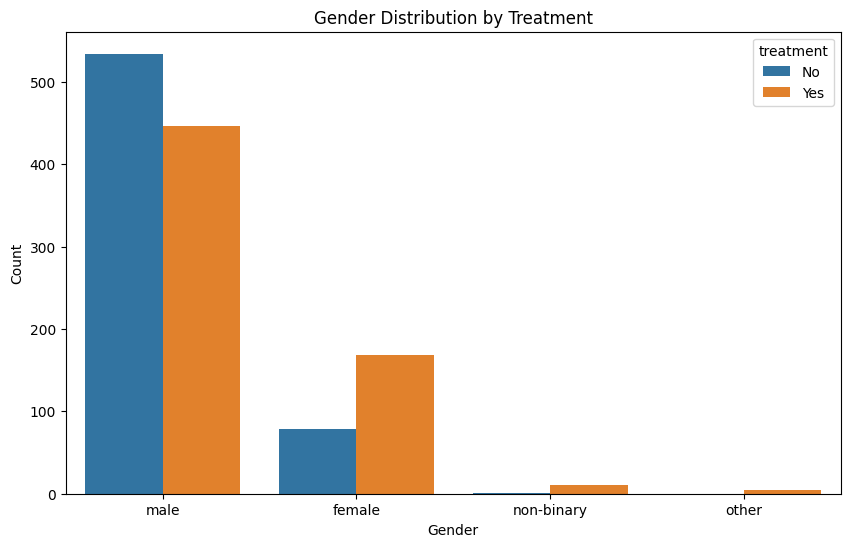


Gender and Treatment Counts:
treatment        No  Yes
gender_cleaned          
female           78  168
male            534  446
non-binary        1   10
other             0    4

Gender and Treatment Percentages:
treatment              No         Yes
gender_cleaned                       
female          31.707317   68.292683
male            54.489796   45.510204
non-binary       9.090909   90.909091
other            0.000000  100.000000


<Figure size 1000x600 with 0 Axes>

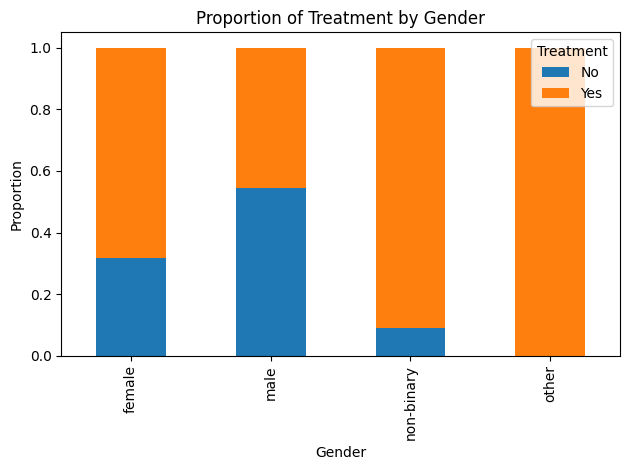

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Simple Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender_cleaned', hue='treatment')
plt.title('Gender Distribution by Treatment')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 2. Print actual numbers
print("\nGender and Treatment Counts:")
print(pd.crosstab(df['gender_cleaned'], df['treatment']))

# 3. Print percentages
print("\nGender and Treatment Percentages:")
print(pd.crosstab(df['gender_cleaned'], df['treatment'], normalize='index') * 100)

# Alternative: Stacked Bar Plot
plt.figure(figsize=(10, 6))
pd.crosstab(df['gender_cleaned'], df['treatment'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Proportion of Treatment by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()

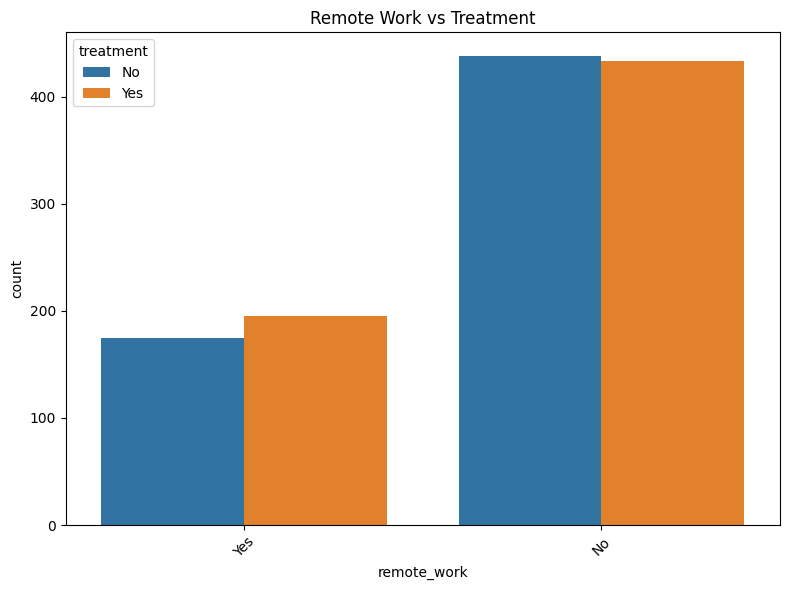

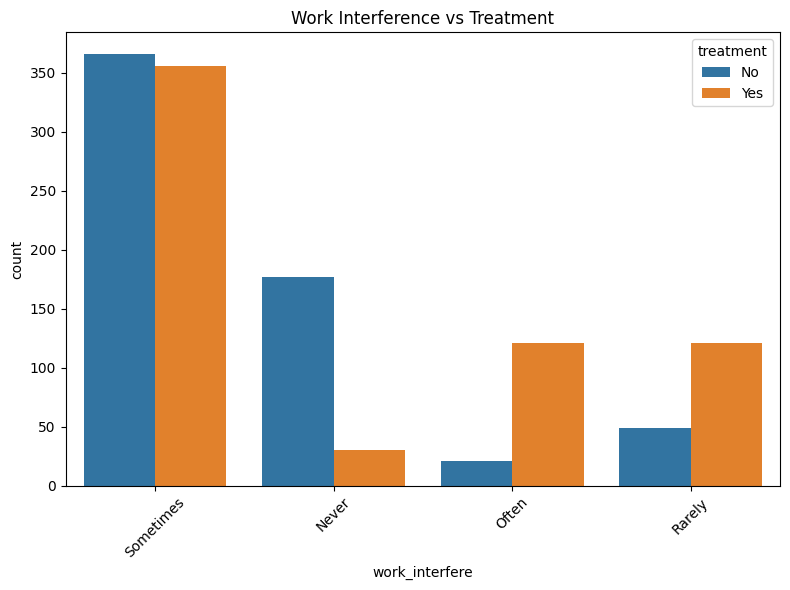

In [43]:
# Remote work vs Treatment
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='remote_work', hue='treatment')
plt.title('Remote Work vs Treatment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Work Interference Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='work_interfere', hue='treatment')
plt.title('Work Interference vs Treatment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

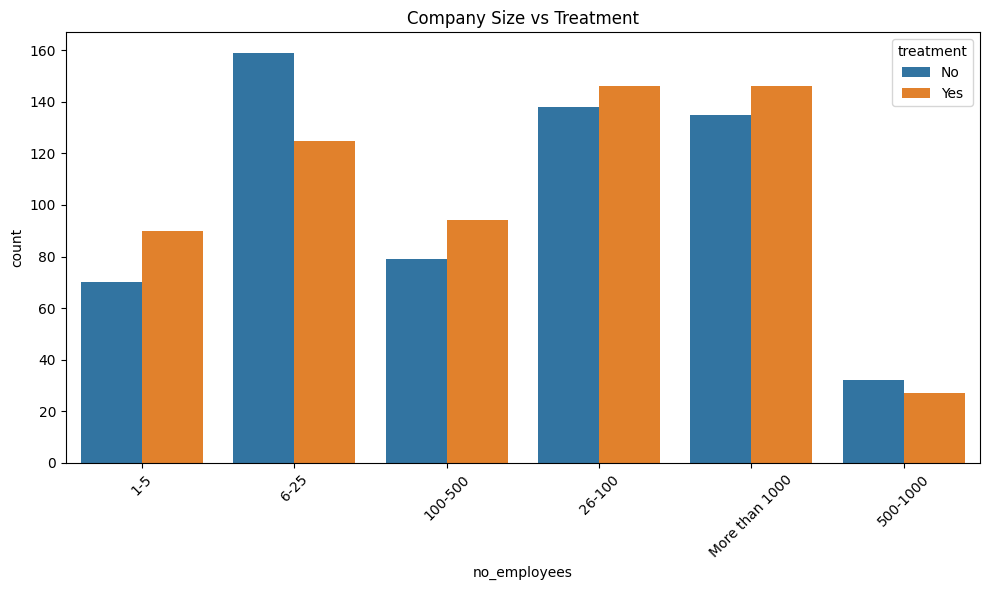

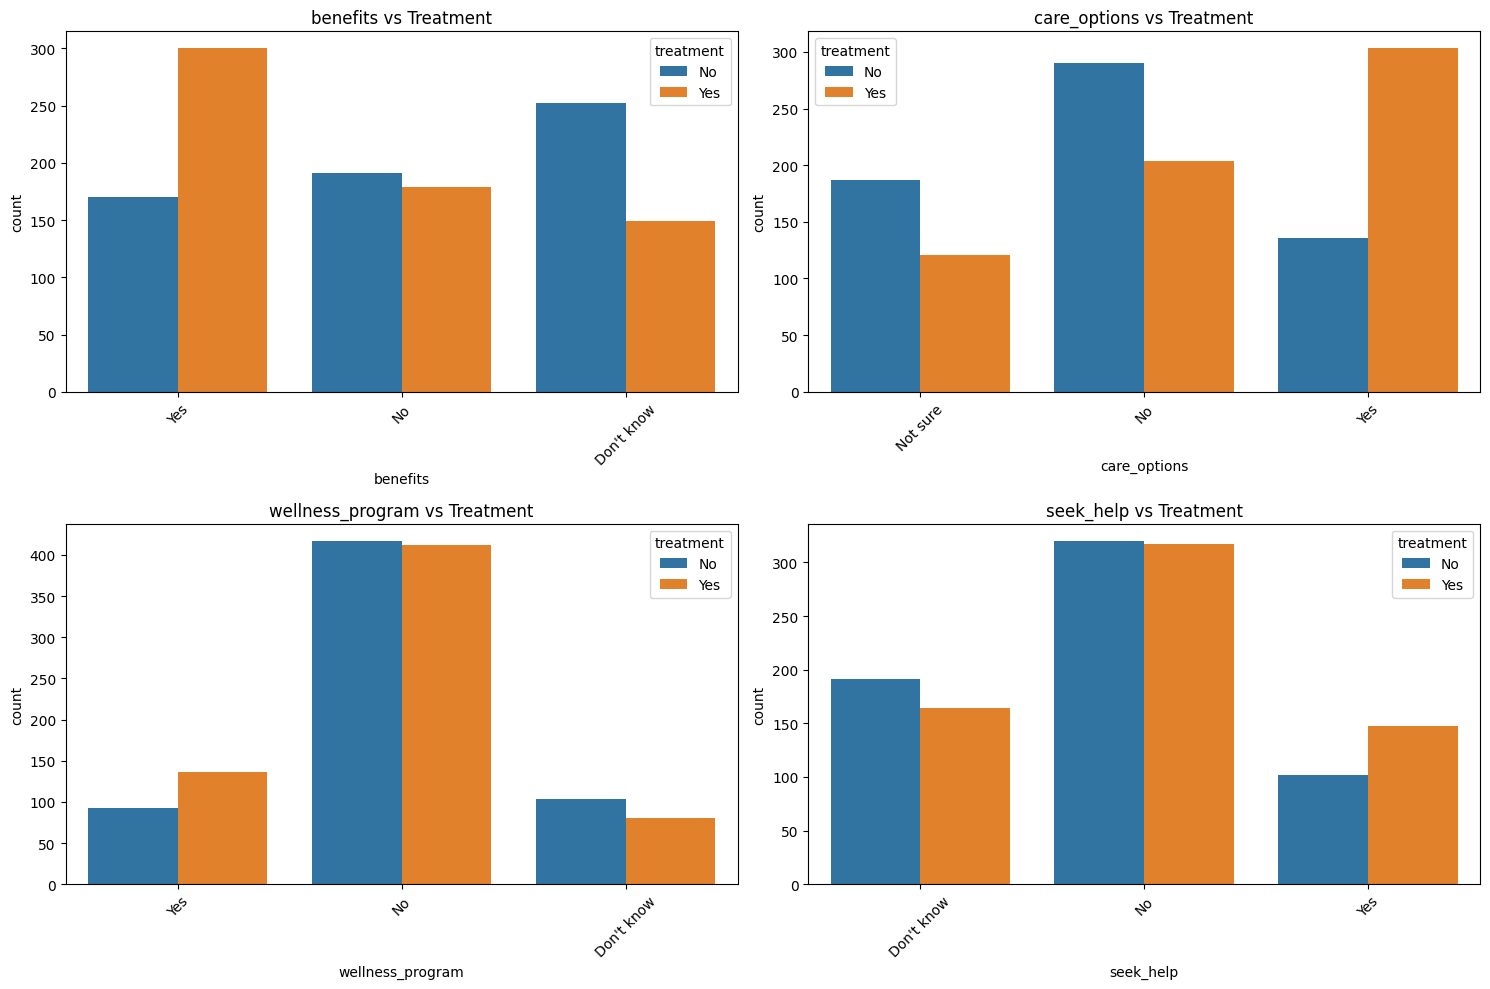

In [44]:
# Company Size vs Treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_employees', hue='treatment')
plt.title('Company Size vs Treatment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Benefits Analysis
benefits_cols = ['benefits', 'care_options', 'wellness_program', 'seek_help']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(benefits_cols):
    sns.countplot(data=df, x=col, hue='treatment', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} vs Treatment')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

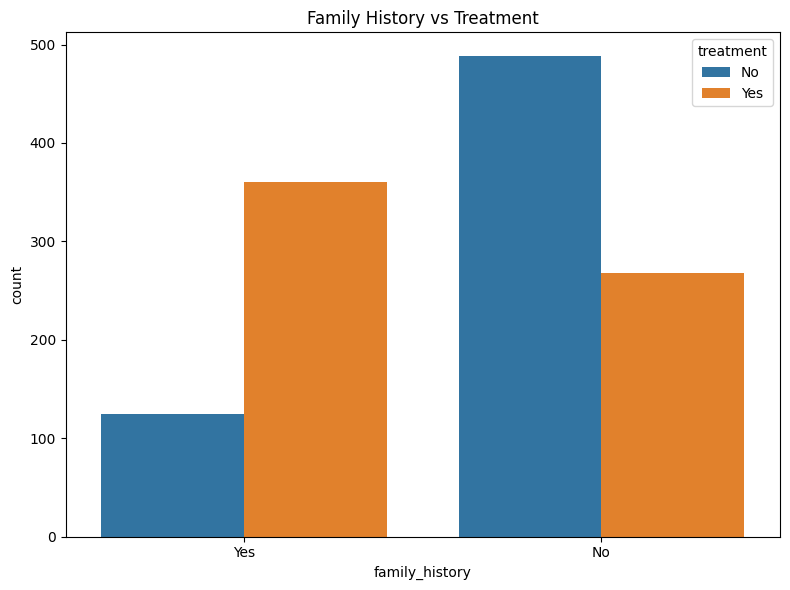


Treatment Percentage by Family History:
treatment              No        Yes
family_history                      
No              64.550265  35.449735
Yes             25.773196  74.226804


In [47]:
# Family History vs Treatment
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='family_history', hue='treatment')
plt.title('Family History vs Treatment')
plt.tight_layout()
plt.show()

# Calculate percentages
print("\nTreatment Percentage by Family History:")
print(pd.crosstab(df['family_history'], df['treatment'], normalize='index') * 100)

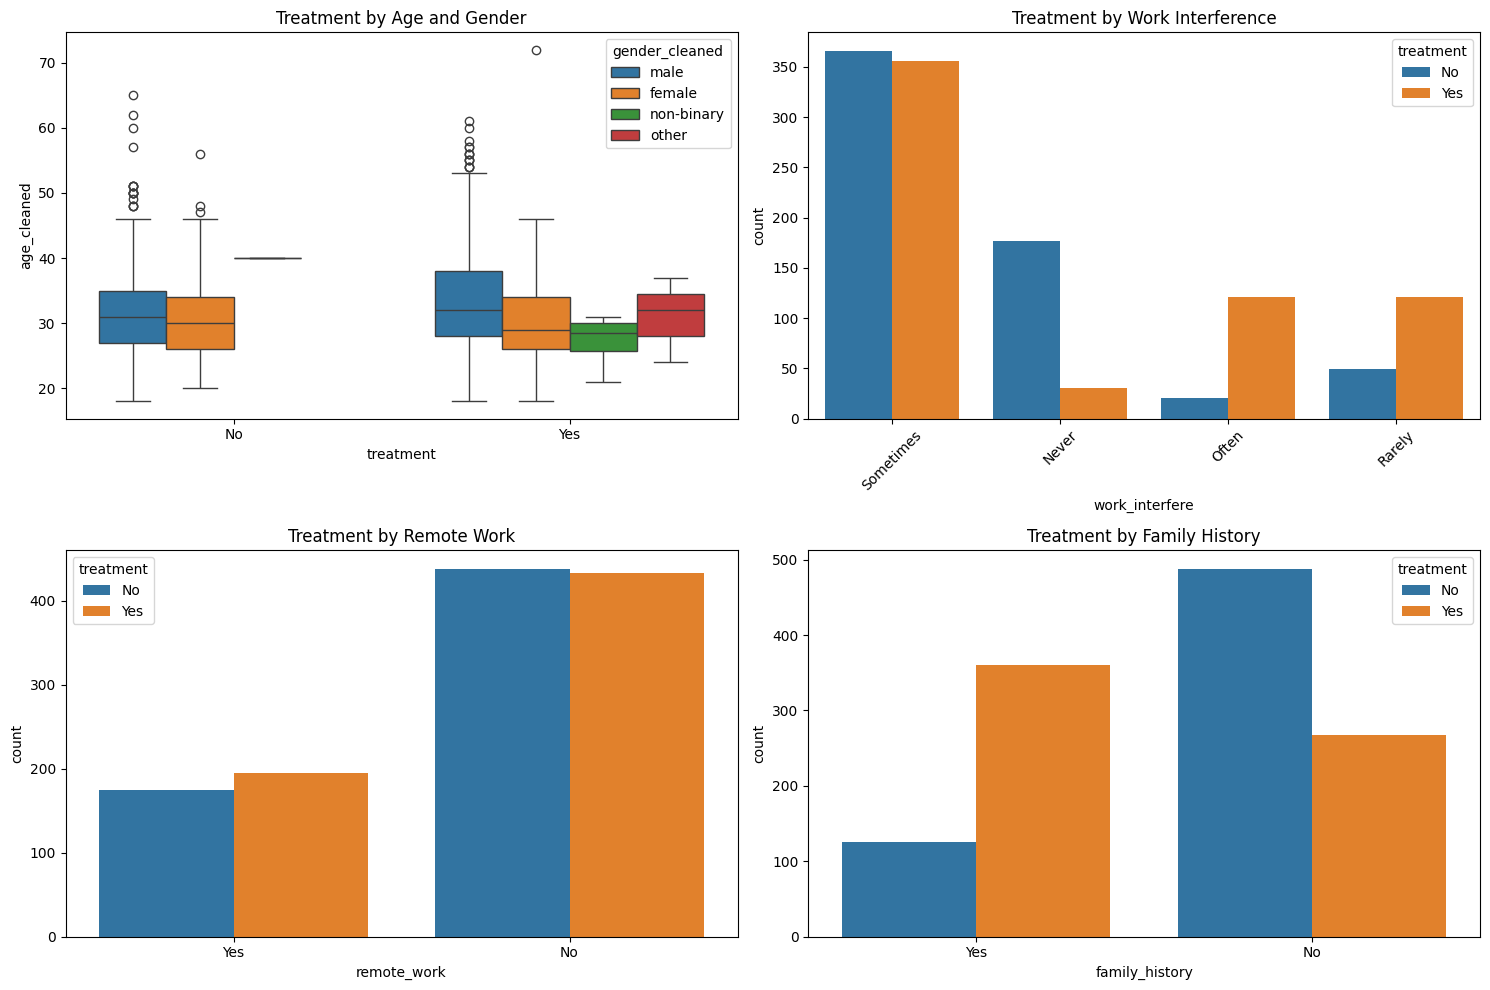

In [48]:
# Create a figure with multiple aspects of mental health support
fig = plt.figure(figsize=(15, 10))

# Plot 1: Treatment by Age Group and Gender
plt.subplot(2, 2, 1)
sns.boxplot(x='treatment', y='age_cleaned', hue='gender_cleaned', data=df)
plt.title('Treatment by Age and Gender')

# Plot 2: Treatment by Work Interference
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='work_interfere', hue='treatment')
plt.title('Treatment by Work Interference')
plt.xticks(rotation=45)

# Plot 3: Treatment by Remote Work
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='remote_work', hue='treatment')
plt.title('Treatment by Remote Work')

# Plot 4: Treatment by Family History
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='family_history', hue='treatment')
plt.title('Treatment by Family History')

plt.tight_layout()
plt.show()

## Logistic Regression

### Logistic Regression for Mental Health Treatment Prediction

#### Introduction
Logistic Regression is a fundamental classification algorithm used to predict binary outcomes. In this analysis, we use it to predict whether an individual will seek mental health treatment based on various features.

#### What is Logistic Regression?
Logistic Regression is a statistical method that:
- Estimates the probability of a binary outcome
- Uses a logistic function to model a dependent variable
- Produces results between 0 and 1 (probability)

#### The Mathematical Process

##### 1. Linear Combination
First, the input features are combined linearly:

z = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ

Where:
- b₀ is the bias term (intercept)
- bᵢ are the coefficients
- xᵢ are the input features

##### 2. Activation Function
The linear combination is transformed using the Activation Function.

###### Sigmoid (Logistic)
~~~
f(x) = 1 / (1 + e^(-x))
~~~
- Range: [0, 1]
- Used in:
  - Binary classification
  - Output layer of binary problems
  - Hidden layers (historically)
- Pros:
  - Smooth gradient
  - Output as probability
- Cons:
  - Vanishing gradient problem
  - Not zero-centered

###### Tanh (Hyperbolic Tangent)
~~~
f(x) = (e^x - e^(-x)) / (e^x + e^(-x))
~~~
- Range: [-1, 1]
- Used in:
  - Hidden layers
  - Recurrent Neural Networks
- Pros:
  - Zero-centered
  - Stronger gradients than sigmoid
- Cons:
  - Still has vanishing gradient problem

###### ReLU (Rectified Linear Unit)
~~~
f(x) = max(0, x)
~~~
- Range: [0, ∞)
- Used in:
  - Hidden layers
  - Convolutional Neural Networks
- Pros:
  - No vanishing gradient
  - Fast computation
  - Sparse activation
- Cons:
  - "Dying ReLU" problem
  - Not zero-centered

###### Leaky ReLU
~~~
f(x) = max(αx, x), where α is small (e.g., 0.01)
~~~
- Range: (-∞, ∞)
- Used in:
  - Alternative to ReLU
- Pros:
  - Prevents dying ReLU
  - All benefits of ReLU
- Cons:
  - Results can be less consistent

###### Softmax
~~~
f(x_i) = e^(x_i) / Σ(e^(x_j))
~~~
- Range: [0, 1], sum = 1
- Used in:
  - Multi-class classification
  - Output layer
- Pros:
  - Outputs as probabilities
  - Good for multi-class
- Cons:
  - Computationally expensive

##### 3. Decision Boundary
- If σ(z) ≥ 0.5, predict class 1 (will seek treatment)
- If σ(z) < 0.5, predict class 0 (won't seek treatment)

#### Training Process
1. **Data Preparation**:
   - Feature scaling (standardization)
   - Encoding categorical variables
   - Handling missing values

2. **Model Training**:
   - Uses Maximum Likelihood Estimation
   - Minimizes the cost function:
     ```
     J(θ) = -1/m Σ[y⁽ⁱ⁾log(h_θ(x⁽ⁱ⁾)) + (1-y⁽ⁱ⁾)log(1-h_θ(x⁽ⁱ⁾))]
     ```
   - Optimizes using gradient descent

3. **Model Evaluation**:
   - Cross-validation
   - Performance metrics calculation
   - ROC curve analysis

#### Feature Processing in Our Model
1. **Numerical Features** (e.g., age):
   - Standardization: (x - mean) / std
   - Missing value imputation

2. **Categorical Features** (e.g., gender):
   - Label encoding or One-hot encoding
   - Missing value handling

#### Model Output Interpretation
- **Probability Score**: P(treatment = 1 | features)
- **Feature Importance**: Coefficient magnitudes
- **Decision Process**:

if P(treatment) ≥ 0.5: predict "Will seek treatment" else: predict "Won't seek treatment"


### Understanding Classification Metrics in Logistic Regression

#### Basic Metrics Explained

##### 1. Accuracy
~~~
Accuracy = (True Positives + True Negatives) / Total Samples
~~~
- Measures overall correctness of predictions
- Range: 0 to 1 (or 0% to 100%)
- Example: 0.7149 means 71.49% of all predictions were correct

##### 2. Confusion Matrix Components
~~~
                    Predicted
Actual    No Treatment    Treatment
No          TN             FP
Yes         FN             TP
~~~
Where:
- TN (True Negative): Correctly predicted "no treatment"
- TP (True Positive): Correctly predicted "treatment"
- FN (False Negative): Incorrectly predicted "no treatment"
- FP (False Positive): Incorrectly predicted "treatment"

##### 3. Precision
~~~
Precision = True Positives / (True Positives + False Positives)
~~~
- Measures accuracy of positive predictions
- "Of those predicted to seek treatment, what proportion actually did?"
- Example: 0.71 means 71% of predicted treatment-seekers actually sought treatment

##### 4. Recall (Sensitivity)
~~~
Recall = True Positives / (True Positives + False Negatives)
~~~
- Measures ability to find all positive cases
- "Of those who actually sought treatment, what proportion did we identify?"
- Example: 0.71 means we identified 71% of actual treatment-seekers

##### 5. F1-Score
~~~
F1 = 2 * (Precision * Recall) / (Precision + Recall)
~~~
- Harmonic mean of precision and recall
- Balances precision and recall
- Range: 0 to 1 (higher is better)

#### Support
- Number of samples in each class
- Example: support=[127, 122] means:
  - 127 cases of "no treatment"
  - 122 cases of "treatment"

#### Macro vs Weighted Averages

##### Macro Average
~~~
Macro = (Metric_class1 + Metric_class2) / 2
~~~
- Simple average across classes
- Treats all classes equally

##### Weighted Average
~~~
Weighted = (Metric_class1 * n_class1 + Metric_class2 * n_class2) / (n_class1 + n_class2)
~~~
- Weighted by class support
- Accounts for class imbalance

#### Example Classification Report
~~~
              precision    recall  f1-score   support
           0       0.72      0.72      0.72       127
           1       0.71      0.71      0.71       122
    accuracy                           0.71       249
   macro avg       0.71      0.71      0.71       249
weighted avg       0.71      0.71      0.71       249
~~~

##### How to Read This:
1. **Rows**:
   - 0: Metrics for "no treatment" class
   - 1: Metrics for "treatment" class
   - macro avg: Simple average of both classes
   - weighted avg: Support-weighted average

2. **Columns**:
   - precision: TP/(TP+FP) for each class
   - recall: TP/(TP+FN) for each class
   - f1-score: Harmonic mean of precision and recall
   - support: Number of samples in each class

#### Additional Metrics

##### ROC-AUC Score
~~~
AUC = Area under the ROC curve
~~~
- Measures model's ability to distinguish between classes
- Range: 0 to 1 (0.5 = random, 1 = perfect)

##### Log Loss
~~~
Log Loss = -1/N Σ(y_i log(p_i) + (1-y_i) log(1-p_i))
~~~
- Measures quality of probabilistic predictions
- Lower is better
- Penalizes confident incorrect predictions heavily


#### Advantages and Limitations
##### Advantages:
- Simple to implement
- Highly interpretable
- Provides probability scores
- Works well with categorical and numerical data

##### Limitations:
- Assumes linear relationship
- May underperform with complex patterns
- Sensitive to outliers
- Requires feature scaling

#### Usage in Mental Health Context
This model helps:
- Screen individuals for potential treatment needs
- Identify key factors influencing treatment-seeking behavior
- Support decision-making in mental health programs

#### Code Implementation
```python
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Create and train model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)
```


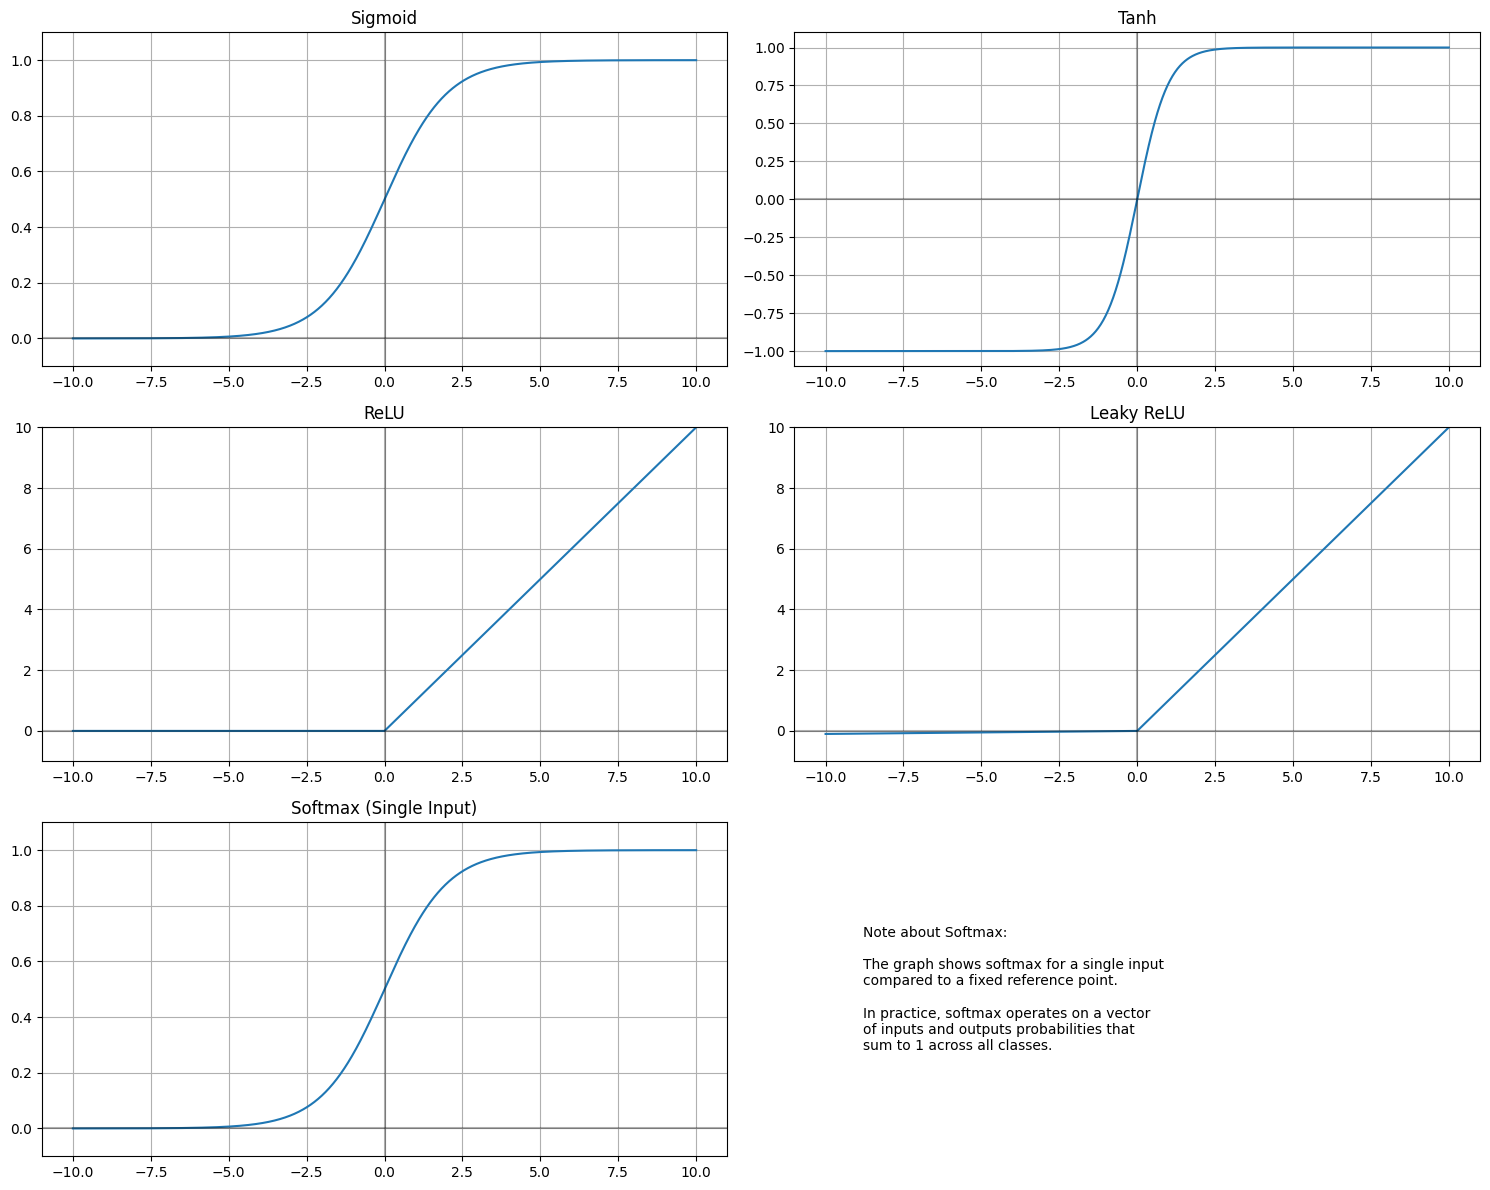

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Create input values
x = np.linspace(-10, 10, 1000)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax_for_single_value(x):
    # Simulate softmax for a single value compared to a fixed reference
    return np.exp(x) / (np.exp(x) + np.exp(0))  # comparing with reference point 0

# Create subplot
plt.figure(figsize=(15, 12))

# Sigmoid
plt.subplot(3, 2, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.ylim(-0.1, 1.1)

# Tanh
plt.subplot(3, 2, 2)
plt.plot(x, tanh(x))
plt.title('Tanh')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.ylim(-1.1, 1.1)

# ReLU
plt.subplot(3, 2, 3)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.ylim(-1, 10)

# Leaky ReLU
plt.subplot(3, 2, 4)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.ylim(-1, 10)

# Softmax
plt.subplot(3, 2, 5)
plt.plot(x, softmax_for_single_value(x))
plt.title('Softmax (Single Input)')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.ylim(-0.1, 1.1)

# Add text explanation for Softmax
plt.subplot(3, 2, 6)
plt.text(0.1, 0.5,
         'Note about Softmax:\n\n' +
         'The graph shows softmax for a single input\n' +
         'compared to a fixed reference point.\n\n' +
         'In practice, softmax operates on a vector\n' +
         'of inputs and outputs probabilities that\n' +
         'sum to 1 across all classes.',
         fontsize=10, ha='left', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Show multiple inputs for Softmax
def softmax_multiple_inputs(x1, x2):
    exp_x1 = np.exp(x1)
    exp_x2 = np.exp(x2)
    return exp_x1 / (exp_x1 + exp_x2)



In [54]:
def prepare_data(df):
    # Make a copy of the entire DataFrame
    df_copy = df.copy()

    # Select features
    features = ['age_cleaned', 'gender_cleaned', 'family_history',
               'work_interfere', 'remote_work', 'benefits',
               'care_options', 'wellness_program', 'seek_help']

    # Create X (features) and y (target) - make copies to avoid warnings
    X = df_copy[features].copy()
    y = df_copy['treatment'].copy()

    # Separate numerical and categorical columns
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # Create imputers
    numerical_imputer = SimpleImputer(strategy='mean')
    categorical_imputer = SimpleImputer(strategy='most_frequent')

    # Impute numerical features using loc
    if len(numerical_features) > 0:
        X.loc[:, numerical_features] = numerical_imputer.fit_transform(X[numerical_features])

    # Impute categorical features using loc
    if len(categorical_features) > 0:
        X.loc[:, categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

    # Encode categorical variables
    le = LabelEncoder()
    for column in categorical_features:
        X.loc[:, column] = le.fit_transform(X[column])

    # Encode target variable
    y = le.fit_transform(y)

    return X, y

# Use the function
X, y = prepare_data(df)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.714859437751004

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       127
           1       0.71      0.71      0.71       122

    accuracy                           0.71       249
   macro avg       0.71      0.71      0.71       249
weighted avg       0.71      0.71      0.71       249



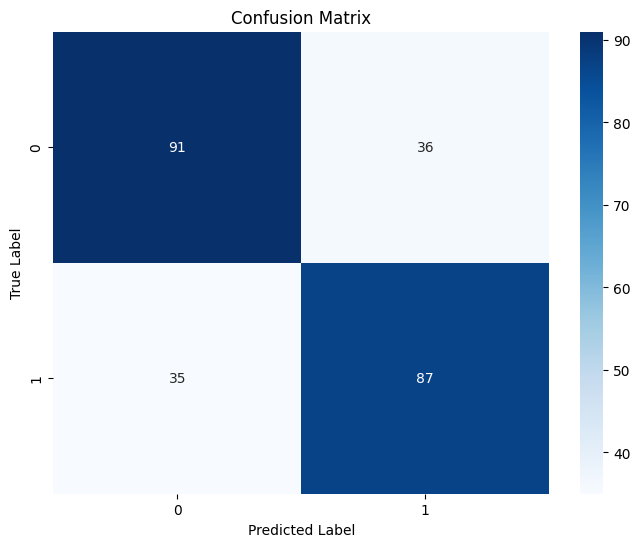

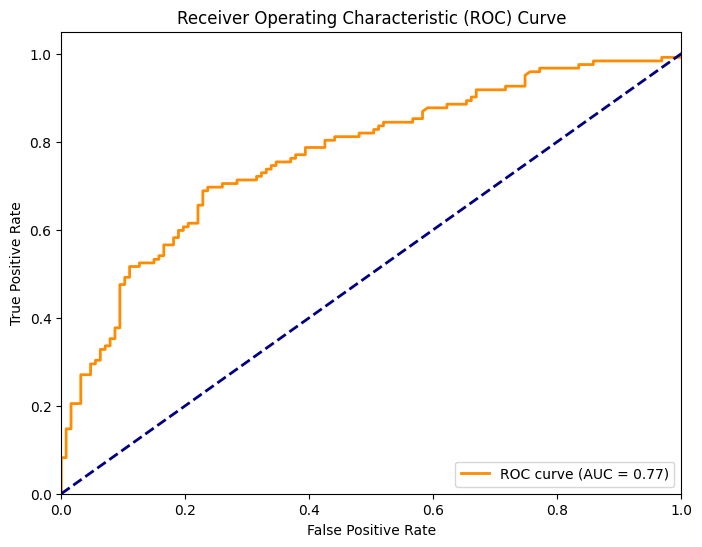


Detailed Metrics:
True Negatives: 91
False Positives: 36
False Negatives: 35
True Positives: 87

Positive Predictive Value (Precision for class 1): 0.707
Negative Predictive Value (Precision for class 0): 0.722


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and print additional metrics
from sklearn.metrics import roc_curve, auc
import numpy as np

# Get probability predictions
y_prob = model.predict_proba(X_test_scaled)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print detailed metrics
print("\nDetailed Metrics:")
print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

print(f"\nPositive Predictive Value (Precision for class 1): {cm[1,1]/(cm[0,1]+cm[1,1]):.3f}")
print(f"Negative Predictive Value (Precision for class 0): {cm[0,0]/(cm[0,0]+cm[1,0]):.3f}")

## Desicion Tree